## Project #3:

* Student name: Milena Afeworki
* Student pace: full time
* Scheduled project review date/time: 06/09/2021 @ 12:45 PT
* Instructor name: Abhineet Kulkarni 
* Blog post URL:


# Tanzanian Water Well Classification

## The Business Problem

## Data Understanding

- **amount_tsh** - Total static head (amount water available to waterpoint)
- **date_recorded** - The date the row was entered
- **funder** - Who funded the well
- **gps_height** - Altitude of the well
- **installer** - Organization that installed the well
- **longitude** - GPS coordinate
- **latitude** - GPS coordinate
- **wpt_name** - Name of the waterpoint if there is one
- **num_private** -
- **basin** - Geographic water basin
- **subvillage** - Geographic location
- **region** - Geographic location
- **region_code** - Geographic location (coded)
- **district_code** - Geographic location (coded)
- **lga** - Geographic location
- **ward** - Geographic location
- **population** - Population around the well
- **public_meeting** - True/False
- **recorded_by** - Group entering this row of data
- **scheme_management** - Who operates the waterpoint
- **scheme_name** - Who operates the waterpoint
- **permit** - If the waterpoint is permitted
- **construction_year** - Year the waterpoint was constructed
- **extraction_type** - The kind of extraction the waterpoint uses
- **extraction_type_group** - The kind of extraction the waterpoint uses
- **extraction_type_class** - The kind of extraction the waterpoint uses
- **management** - How the waterpoint is managed
- **management_group** - How the waterpoint is managed
- **payment** - What the water costs
- **payment_type** - What the water costs
- **water_quality** - The quality of the water
- **quality_group** - The quality of the water
- **quantity** - The quantity of water
- **quantity_group** - The quantity of water
- **source** - The source of the water
- **source_type** - The source of the water
- **source_class** - The source of the water
- **waterpoint_type** - The kind of waterpoint
- **waterpoint_type_group** - The kind of waterpoint

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


## Obtain data

Let's first import the data and take a look at the info to see if we need to do some data cleaning.

In [2]:
df = pd.read_csv('training_set_values.csv')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [4]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

## Scrubbing the data
### Cleaning based on info
Key observations from here:

**1. Dealing with missing values:**
- funder  = 3635
- installer = 3655  
- subvillage  = 371
- public_meeting = 3334
- scheme_managment = 3877
- scheme_name = 28166
- permit = 3056

**2. Dealing with date_recorded data type.**

**3. Dealing with outliers.**

#### Dealing with the missing values.

In [5]:
df.funder.value_counts(normalize=True)

Government Of Tanzania         0.162898
Danida                         0.055841
Hesawa                         0.039487
Rwssp                          0.024639
World Bank                     0.024191
                                 ...   
Said Salum Ally                0.000018
Buluga Subvillage Community    0.000018
Unice/ Cspd                    0.000018
Norad/government               0.000018
Kanisa La Neema                0.000018
Name: funder, Length: 1897, dtype: float64

Since for this project we would be more concerned about the functionality of the wells more than where the fund originally came from, the 'funder' column is not necessary for our analysis and hence I choose to drop it. Same goes for 'installer'

In [6]:
df.drop(columns=['scheme_name', 'subvillage', 'public_meeting', 'num_private'], axis=1, inplace = True)

**Scheme managment**

In [7]:
df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

We might need this feature as it might give a better glance at which organization is responsible for the managment of a water well project scheme.

#### Dealing with date_recorded data type

In [8]:
# df['year_'] = pd.to_datetime(df['date_recorded']).dt.year

In [9]:
# df.year.value_counts(normalize=True)

In [10]:
# df['month'] = pd.to_datetime(df['date_recorded']).dt.month

In [11]:
# df.month.value_counts(normalize=True)

Tanzania has a rainy/wet season from December to May and a dry season from July to October. But as seen from the data not all the wells recieve their water source from rainfall so the season may not be of importance to us but we will keep the year of record. 

In [12]:
df.drop(columns=['date_recorded'], axis=1, inplace = True)

In [13]:
# df.year.dtype

Ok it looks good so far.

### Dealing with outliers

Lets take a look at the location of those wells on the map and explore for any misplaced data or anything that looks weird.

C:\Users\milen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


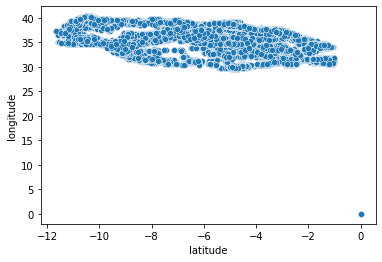

In [14]:
sns.scatterplot('latitude', 'longitude', data=df);

looking at the scatter plot of the locational coordinates, we notice an outlier with a 0' 0' latitude and longitude which really doesn't make sense since these points are far off the Tanzania. In this next step lets see how many of our data have these coordinates and drop them accordingly.

In [15]:
test = df.loc[df['longitude']==0, 'latitude'].value_counts()
test

-2.000000e-08    1812
Name: latitude, dtype: int64

In [16]:
to_drop = df.loc[(df['longitude']==0) & (df['latitude'] == -2.000000e-08)]
to_drop

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,region,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
21,6091,0.0,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,Lake Victoria,Shinyanga,...,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump
53,32376,0.0,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,Lake Victoria,Mwanza,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
168,72678,0.0,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,Lake Victoria,Shinyanga,...,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
177,56725,0.0,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,Lake Victoria,Shinyanga,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
253,13042,0.0,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,Lake Victoria,Mwanza,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,0.0,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,Lake Victoria,Shinyanga,...,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
59208,3631,0.0,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,Lake Victoria,Shinyanga,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
59295,60843,0.0,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,Lake Victoria,Shinyanga,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
59324,748,0.0,World Vision,0,World Vision,0.0,-2.000000e-08,Mwazwilo,Lake Victoria,Shinyanga,...,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [17]:
df.drop(to_drop.index, axis=0, inplace=True)

C:\Users\milen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


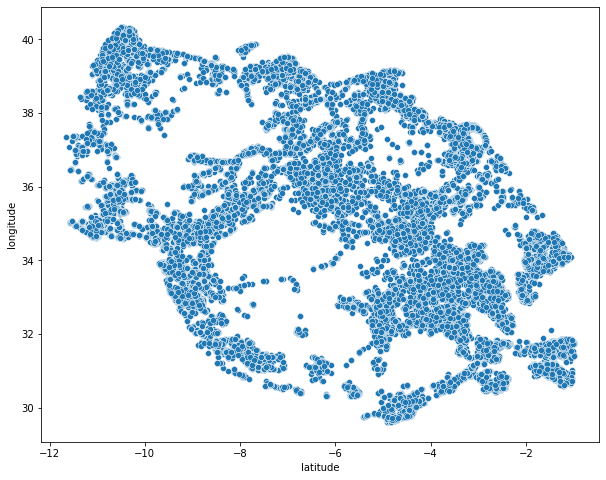

In [18]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot('latitude', 'longitude', data=df);

Now this looks much better.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     57588 non-null  int64  
 1   amount_tsh             57588 non-null  float64
 2   funder                 53966 non-null  object 
 3   gps_height             57588 non-null  int64  
 4   installer              53952 non-null  object 
 5   longitude              57588 non-null  float64
 6   latitude               57588 non-null  float64
 7   wpt_name               57588 non-null  object 
 8   basin                  57588 non-null  object 
 9   region                 57588 non-null  object 
 10  region_code            57588 non-null  int64  
 11  district_code          57588 non-null  int64  
 12  lga                    57588 non-null  object 
 13  ward                   57588 non-null  object 
 14  population             57588 non-null  int64  
 15  re

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(49610, 35)

## Explore

Now that our data is clean we will move on to the next step and merge the two tables to their corresponding id inorder to label them according to their functionality.

### Merging Labels to the well ids

In [22]:
df1 = pd.read_csv('training_set_labels.csv')
df1

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [23]:
# Replace target values - there are three classes
df1 = df1.replace({'status_group': {'functional' : 1, 
                                'non functional' : 0, 
                                'functional needs repair' : 2}})
# Check to see that it worked
df1.iloc[15:20]

,id,status_group
15,61848,1
16,48451,0
17,58155,0
18,34169,2
19,18274,1


In [24]:
df2 = pd.merge(df, df1, how = 'inner', left_on = ['id'], right_on = ['id'])
df2.shape

(49610, 36)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

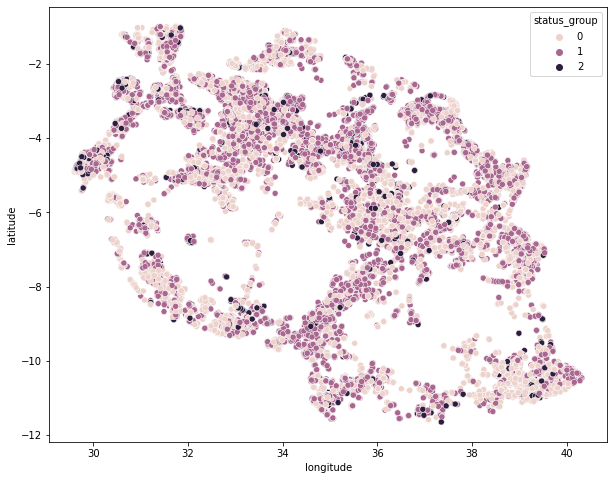

In [25]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = "longitude", y = "latitude", hue = "status_group", data = df2)

In [26]:
df2.status_group.value_counts()

1    27213
0    19130
2     3267
Name: status_group, dtype: int64

(array([19130.,     0.,     0.,     0.,     0., 27213.,     0.,     0.,
            0.,  3267.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

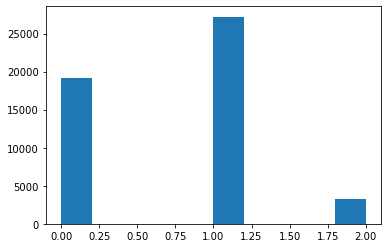

In [27]:
plt.hist('status_group', data=df2)

We do see a class inbalance in the status group with 20549- functional, 13282- non functional, 2408- needs repair.

<AxesSubplot:xlabel='gps_height', ylabel='status_group'>

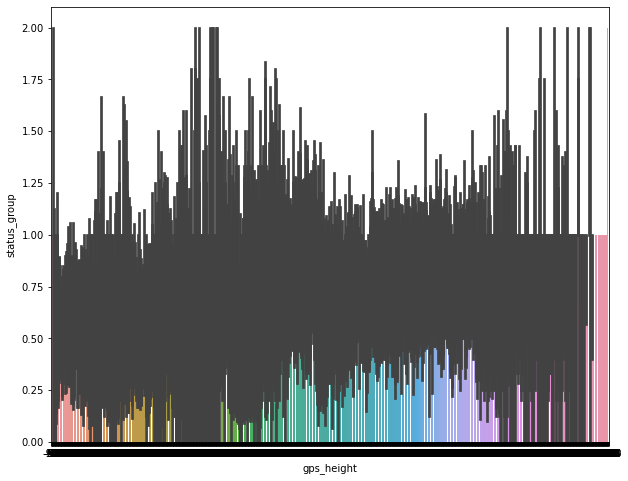

In [28]:
plt.figure(figsize=(10, 8))
sns.barplot(x = "gps_height", y = "status_group", data = df2)

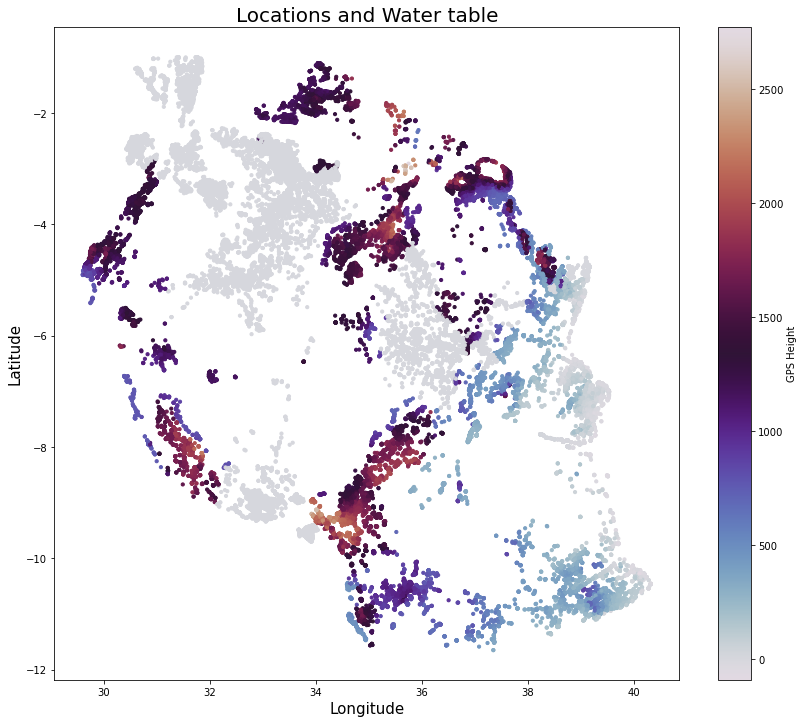

In [29]:
plt.figure(figsize=(14,12))
plt.scatter(x='longitude', y='latitude', c='gps_height' , data=df2, s=10, cmap='twilight')
plt.colorbar().set_label('GPS Height')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.title('Locations and Water table', fontsize=20)

plt.show()


In [30]:
quantity_df = df2.groupby('quantity')['status_group'].value_counts().unstack()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'dry'),
  Text(1, 0, 'enough'),
  Text(2, 0, 'insufficient'),
  Text(3, 0, 'seasonal'),
  Text(4, 0, 'unknown')])

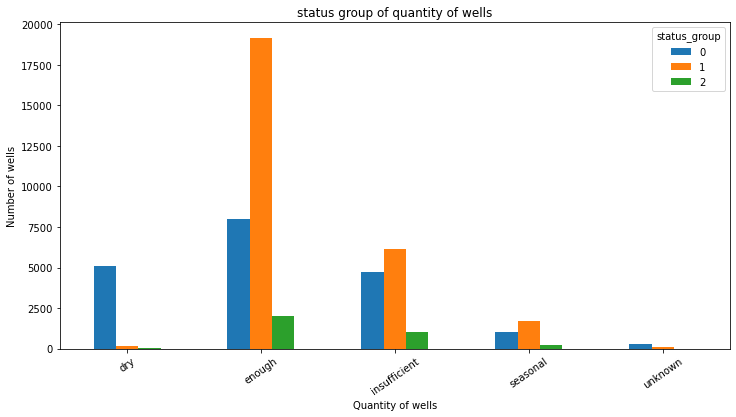

In [31]:
quantity_df.plot.bar(figsize = (12, 6))
plt.title('status group of quantity of wells')
plt.xlabel('Quantity of wells')
plt.ylabel('Number of wells')
plt.xticks(rotation = 35)

In [32]:
quantity_df = df2.groupby('water_quality')['status_group'].value_counts().unstack()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'coloured'),
  Text(1, 0, 'fluoride'),
  Text(2, 0, 'fluoride abandoned'),
  Text(3, 0, 'milky'),
  Text(4, 0, 'salty'),
  Text(5, 0, 'salty abandoned'),
  Text(6, 0, 'soft'),
  Text(7, 0, 'unknown')])

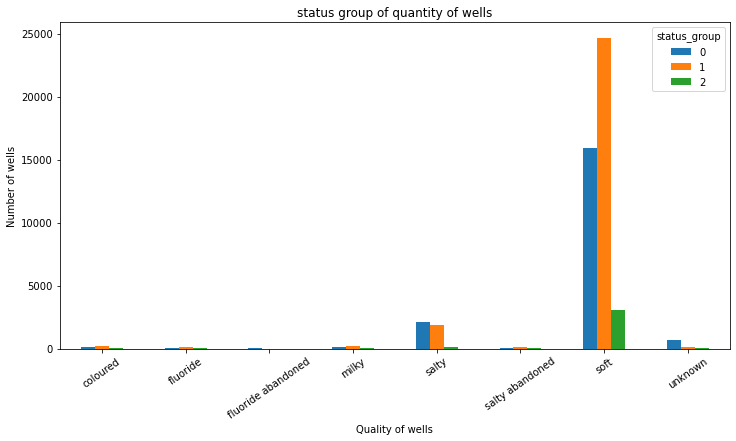

In [33]:
quantity_df.plot.bar(figsize = (12, 6))
plt.title('status group of quantity of wells')
plt.xlabel('Quality of wells')
plt.ylabel('Number of wells')
plt.xticks(rotation = 35)

In [34]:
quantity_df = df2.groupby('extraction_type_class')['status_group'].value_counts().unstack()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'gravity'),
  Text(1, 0, 'handpump'),
  Text(2, 0, 'motorpump'),
  Text(3, 0, 'other'),
  Text(4, 0, 'rope pump'),
  Text(5, 0, 'submersible'),
  Text(6, 0, 'wind-powered')])

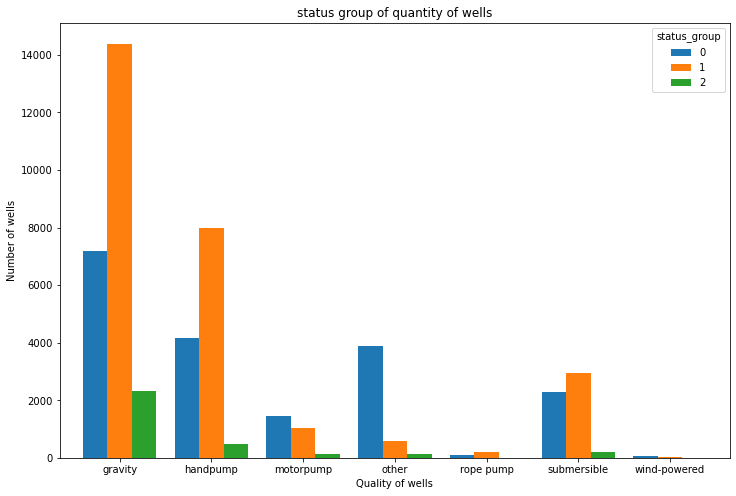

In [35]:
quantity_df.plot.bar(figsize = (12, 8), width=0.8)
plt.title('status group of quantity of wells')
plt.xlabel('Quality of wells')
plt.ylabel('Number of wells')
plt.xticks(rotation = 0)

Text(0.5, 0, 'Number of wells')

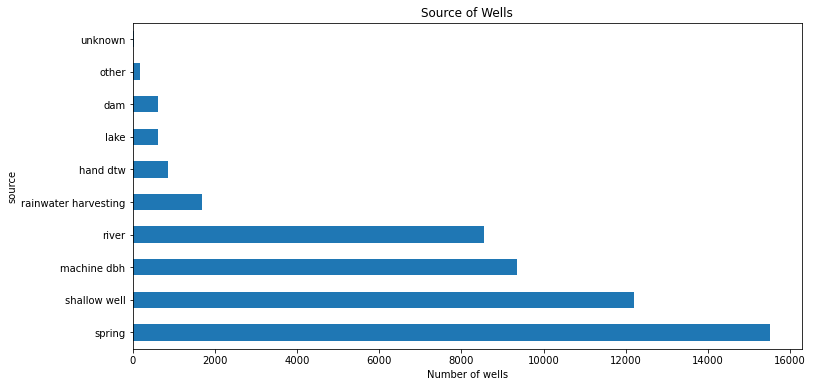

In [36]:
df2.source.value_counts().plot.barh(figsize = (12, 6))
plt.title('Source of Wells')
plt.ylabel('source')
plt.xlabel('Number of wells')

In [37]:
# import plotly as px

### Construction year

In [38]:
df2.construction_year.value_counts()

0       15312
2008     2479
2009     2353
2010     2283
2000     1491
2007     1456
2006     1358
2003     1204
2011     1127
2004     1048
1978     1011
2002     1000
2012      947
2005      919
1999      900
1995      864
1998      829
1985      802
1984      722
1982      697
1972      690
1990      652
1994      649
1974      639
1992      604
1996      602
1980      594
1993      513
1997      503
1988      500
2001      490
1983      466
1975      425
1986      402
1976      375
1991      304
1989      303
1970      303
1987      284
1981      221
1973      183
1977      183
1979      173
2013      162
1971      128
1963       84
1967       82
1968       67
1969       59
1960       45
1964       40
1962       28
1961       20
1965       19
1966       16
Name: construction_year, dtype: int64

In [39]:
zeroes = df2.loc[df2['construction_year']==0].index
df2.drop(zeroes, inplace = True)

In [40]:
df2.shape

(34298, 36)

In [41]:
norm = df2.construction_year.value_counts()

In [42]:
norm = df2.groupby('construction_year')['status_group'].value_counts().unstack()

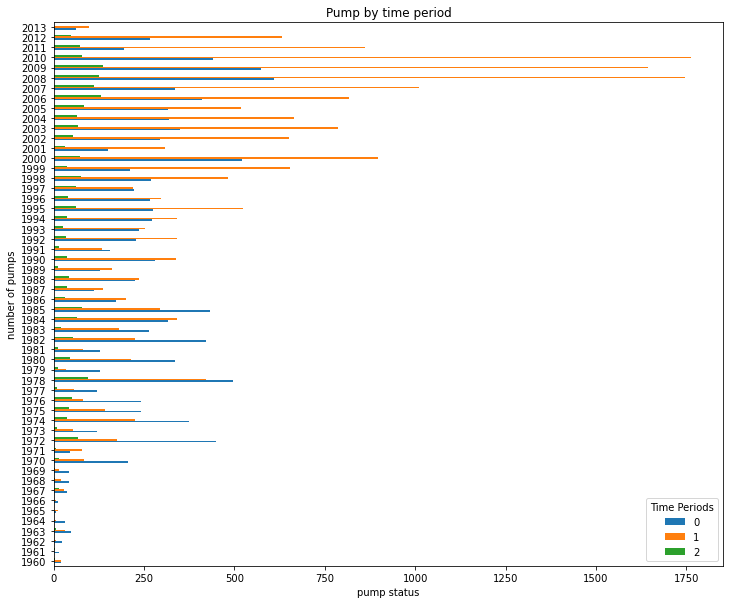

In [43]:

norm.plot.barh(figsize = (12, 10))
plt.title('Pump by time period')
plt.xlabel('pump status')
plt.ylabel('number of pumps')
plt.xticks(rotation = 0)
plt.legend(title = 'Time Periods')

In [44]:
bins = [1960, 1970, 1980, 1990, 2000, 2010, 2015]
periods = ['1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2015']

df2['construction_periods'] = pd.cut(df2['construction_year'], bins ,
                                         labels = periods, right = False)

In [45]:
df2.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,region,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,construction_periods
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Iringa,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1,1990-1999
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Mara,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1,2010-2015
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Manyara,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1,2000-2009
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0,1980-1989
4,9944,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Tanga,...,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,1,2000-2009


In [46]:
df2.construction_periods.value_counts()

2000-2009    13798
1990-1999     6420
1980-1989     4991
2010-2015     4519
1970-1979     4110
1960-1969      460
Name: construction_periods, dtype: int64

In [47]:
time_periods = df2.groupby('status_group')['construction_periods'].value_counts().unstack()

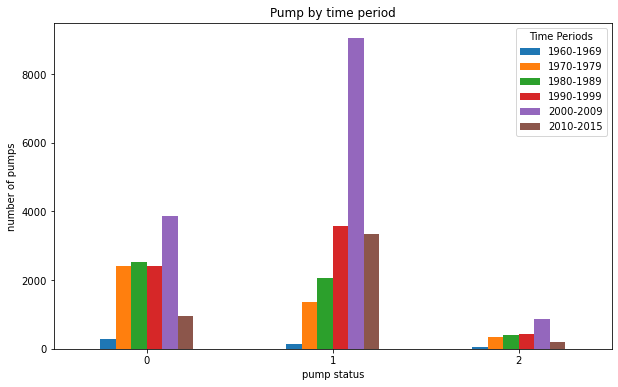

In [48]:
time_periods.plot.bar(figsize = (10, 6))
plt.title('Pump by time period')
plt.xlabel('pump status')
plt.ylabel('number of pumps')
plt.xticks(rotation = 0)
plt.legend(title = 'Time Periods')

In [49]:
df2.drop_duplicates()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,region,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,construction_periods
0,69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Iringa,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1,1990-1999
1,8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,Lake Victoria,Mara,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,1,2010-2015
2,34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Manyara,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,1,2000-2009
3,67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0,1980-1989
4,9944,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Tanga,...,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,1,2000-2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49602,44885,0.0,Government Of Tanzania,540,Government,38.044070,-4.272218,Kwa,Pangani,Kilimanjaro,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,0,1960-1969
49605,11164,500.0,World Bank,351,ML appro,37.634053,-6.124830,Chimeredya,Wami / Ruvu,Morogoro,...,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,0,2000-2009
49606,60739,10.0,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,Pangani,Kilimanjaro,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,1,1990-1999
49607,27263,4700.0,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Iringa,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,1,1990-1999


The typical life expectancy of a water well is supposedly 65-100 years, and the life expectency of a water well pump is 10-15 years. we will bin the construction year column in such a way.

In [50]:
df2['construction_year'].describe()

count    34298.000000
mean      1996.860429
std         12.556262
min       1960.000000
25%       1987.000000
50%       2000.000000
75%       2008.000000
max       2013.000000
Name: construction_year, dtype: float64

### Payment

In [51]:
payment = df2.groupby('status_group')['payment_type'].value_counts(normalize = True).unstack()

Text(0, 0.5, 'Percentage')

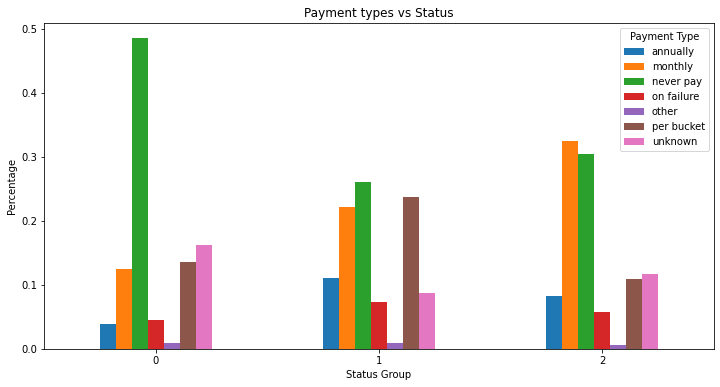

In [52]:
payment.plot.bar(figsize = (12, 6))
plt.xticks(rotation = 0)
plt.title('Payment types vs Status')
plt.legend(title = 'Payment Type')
plt.xlabel('Status Group')
plt.ylabel('Percentage')

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34298 entries, 0 to 49609
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     34298 non-null  int64   
 1   amount_tsh             34298 non-null  float64 
 2   funder                 34298 non-null  object  
 3   gps_height             34298 non-null  int64   
 4   installer              34298 non-null  object  
 5   longitude              34298 non-null  float64 
 6   latitude               34298 non-null  float64 
 7   wpt_name               34298 non-null  object  
 8   basin                  34298 non-null  object  
 9   region                 34298 non-null  object  
 10  region_code            34298 non-null  int64   
 11  district_code          34298 non-null  int64   
 12  lga                    34298 non-null  object  
 13  ward                   34298 non-null  object  
 14  population             34298 non-null 

In [54]:
df2.amount_tsh.value_counts()

0.0        18071
500.0       2825
50.0        2237
20.0        1360
1000.0      1297
           ...  
38000.0        1
8500.0         1
6300.0         1
60000.0        1
12.0           1
Name: amount_tsh, Length: 91, dtype: int64

In [55]:
categorical = ['']

In [56]:
df2.lga.value_counts()

Njombe           2441
Moshi Rural      1219
Arusha Rural     1164
Kilosa           1058
Kasulu           1039
                 ... 
Kigoma Urban       71
Mtwara Urban       59
Tarime             53
Ilemela            26
Singida Rural      19
Name: lga, Length: 81, dtype: int64

In [57]:
df2.population.value_counts()

1        5810
150      1744
200      1553
250      1469
0        1342
         ... 
1354        1
408         1
30500       1
1930        1
1439        1
Name: population, Length: 1006, dtype: int64

In [58]:
df2.extraction_type.value_counts()

gravity                      19250
submersible                   3541
other                         2729
nira/tanira                   2047
swn 80                        1668
india mark ii                 1505
mono                          1251
ksb                           1027
afridev                        730
other - rope pump              220
other - swn 81                 166
india mark iii                  62
windmill                        50
other - play pump               41
climax                           8
walimi                           2
other - mkulima/shinyanga        1
Name: extraction_type, dtype: int64

In [59]:
df2.extraction_type_group.value_counts()

gravity            19250
submersible         4568
other               2729
nira/tanira         2047
swn 80              1668
india mark ii       1505
mono                1251
afridev              730
rope pump            220
other handpump       210
india mark iii        62
wind-powered          50
other motorpump        8
Name: extraction_type_group, dtype: int64

In [60]:
df2.extraction_type_class.value_counts()

gravity         19250
handpump         6222
submersible      4568
other            2729
motorpump        1259
rope pump         220
wind-powered       50
Name: extraction_type_class, dtype: int64

Since all the extraction types are more or less similar we are going to work with the extraction type class and drop the others

In [61]:
df2.drop(columns=['extraction_type', 'extraction_type_group'], axis=1, inplace=True)

In [62]:
df2.management.value_counts()

vwc                 23259
water board          2670
wua                  2114
wug                  2013
private operator     1422
parastatal            976
company               624
water authority       565
other                 420
other - school         99
trust                  73
unknown                63
Name: management, dtype: int64

In [63]:
df2.management_group.value_counts()

user-group    30056
commercial     2684
parastatal      976
other           519
unknown          63
Name: management_group, dtype: int64

since management group has a more concise classification we will stick with that and drop the management column

In [64]:
df2.payment.value_counts()

never pay                11848
pay monthly               6625
pay per bucket            6584
unknown                   3989
pay annually              2816
pay when scheme fails     2128
other                      308
Name: payment, dtype: int64

In [65]:
df2.payment_type.value_counts()

never pay     11848
monthly        6625
per bucket     6584
unknown        3989
annually       2816
on failure     2128
other           308
Name: payment_type, dtype: int64

In [66]:
df2.quality_group.value_counts()

good        30362
salty        2968
unknown       541
colored       167
fluoride      158
milky         102
Name: quality_group, dtype: int64

In [67]:
df2.water_quality.value_counts()

soft                  30362
salty                  2817
unknown                 541
coloured                167
salty abandoned         151
fluoride                151
milky                   102
fluoride abandoned        7
Name: water_quality, dtype: int64

In [68]:
df2.source.value_counts()

spring                  12146
river                    7658
machine dbh              6583
shallow well             5562
rainwater harvesting      938
hand dtw                  525
lake                      438
dam                       259
other                     160
unknown                    29
Name: source, dtype: int64

In [69]:
df2.source_class.value_counts()

groundwater    24816
surface         9293
unknown          189
Name: source_class, dtype: int64

In [70]:
df2.source_type.value_counts()

spring                  12146
river/lake               8096
borehole                 7108
shallow well             5562
rainwater harvesting      938
dam                       259
other                     189
Name: source_type, dtype: int64

since source type and class are the same we will take source type and drop source and source class

In [71]:
df2.waterpoint_type.value_counts()

communal standpipe             20017
hand pump                       6806
communal standpipe multiple     4152
other                           2957
improved spring                  312
cattle trough                     50
dam                                4
Name: waterpoint_type, dtype: int64

In [72]:
df2.waterpoint_type_group.value_counts()

communal standpipe    24169
hand pump              6806
other                  2957
improved spring         312
cattle trough            50
dam                       4
Name: waterpoint_type_group, dtype: int64

In [73]:
df2.quantity.value_counts()

enough          20784
insufficient     8601
dry              2942
seasonal         1688
unknown           283
Name: quantity, dtype: int64

In [74]:
df2.quantity_group.value_counts()

enough          20784
insufficient     8601
dry              2942
seasonal         1688
unknown           283
Name: quantity_group, dtype: int64

In [75]:
df2.region.value_counts()

Iringa           4850
Kilimanjaro      4188
Morogoro         2949
Arusha           2816
Kigoma           2786
Ruvuma           2605
Pwani            2456
Tanga            2452
Rukwa            1782
Manyara          1478
Mtwara           1471
Mara             1363
Singida          1048
Lindi            1013
Dar es Salaam     758
Shinyanga         163
Mwanza            120
Name: region, dtype: int64

drop waterpoint_type

In [76]:
df2.drop(columns=['management', 'payment_type', 'water_quality', 'source',
                  'source_class', 'waterpoint_type', 'quantity_group',
                  'region_code'], axis=1, inplace=True)

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34298 entries, 0 to 49609
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     34298 non-null  int64   
 1   amount_tsh             34298 non-null  float64 
 2   funder                 34298 non-null  object  
 3   gps_height             34298 non-null  int64   
 4   installer              34298 non-null  object  
 5   longitude              34298 non-null  float64 
 6   latitude               34298 non-null  float64 
 7   wpt_name               34298 non-null  object  
 8   basin                  34298 non-null  object  
 9   region                 34298 non-null  object  
 10  district_code          34298 non-null  int64   
 11  lga                    34298 non-null  object  
 12  ward                   34298 non-null  object  
 13  population             34298 non-null  int64   
 14  recorded_by            34298 non-null 

In [78]:
df2.quantity.value_counts()

enough          20784
insufficient     8601
dry              2942
seasonal         1688
unknown           283
Name: quantity, dtype: int64

In [79]:
df2.scheme_management.value_counts()

VWC                 21869
Water Board          2459
WUA                  2431
Water authority      2373
WUG                  1749
Company               997
Parastatal            902
Private operator      851
Other                 506
SWC                    97
Trust                  63
None                    1
Name: scheme_management, dtype: int64

In [80]:
df2.columns

Index(['id', 'amount_tsh', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'basin', 'region', 'district_code', 'lga',
       'ward', 'population', 'recorded_by', 'scheme_management', 'permit',
       'construction_year', 'extraction_type_class', 'management_group',
       'payment', 'quality_group', 'quantity', 'source_type',
       'waterpoint_type_group', 'status_group', 'construction_periods'],
      dtype='object')

### Creating Dummies

In [81]:
target = ['status_group']
to_drop = ['wpt_name', 'population', 'recorded_by', 'construction_year']
categorical = ['funder', 'installer', 'basin', 'region', 'district_code', 'lga', 'ward',
               'scheme_management', 'permit', 'extraction_type_class', 'management_group', 'payment',
               'quality_group', 'quantity', 'source_type', 'waterpoint_type_group',
               'construction_periods']


continuous = ['amount_tsh', 'gps_height', 'longitude', 'latitude']

In [82]:

for col in categorical:
    print(col, df2[col].value_counts().count())

funder 1232
installer 1358
basin 9
region 17
district_code 16
lga 81
ward 1234
scheme_management 12
permit 2
extraction_type_class 7
management_group 5
payment 7
quality_group 6
quantity 5
source_type 7
waterpoint_type_group 6
construction_periods 6


In [83]:
categories_to_remove = {}
for col in categorical:
    df_tmp = pd.DataFrame(df2[col].value_counts(normalize=True))
    other_categories = list(df_tmp.loc[df_tmp[col]<0.01].index)
    df2[col] = df2[col].map(lambda x: 'other' if x in other_categories else x)
    categories_to_remove[col] = other_categories

In [84]:
#drop 'lga' & 'ward' since the region feature serves the same purpose
for item in ['lga', 'ward']:
    to_drop.append(item)
    categorical.remove(item)

In [85]:
df_dummies = pd.get_dummies(df2.drop(to_drop, axis=1))
df_dummies.sort_values(by='id')

,id,amount_tsh,gps_height,longitude,latitude,permit,status_group,funder_0,funder_Amref,funder_Danida,...,source_type_spring,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_other,construction_periods_1960-1969,construction_periods_1970-1979,construction_periods_1980-1989,construction_periods_1990-1999,construction_periods_2000-2009,construction_periods_2010-2015
8869,3,10.0,1639,37.147432,-3.187555,True,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
30041,11,30.0,64,38.663639,-5.805746,False,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
18312,12,0.0,1332,36.756231,-3.373772,False,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
25105,16,0.0,1014,35.333713,-10.469638,True,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
37844,17,0.0,1606,36.624293,-3.276274,True,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41068,74239,1000.0,2140,33.926871,-8.960687,False,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
12615,74240,0.0,1183,37.007726,-3.280868,False,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
18834,74243,0.0,1188,33.963539,-1.429477,False,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
90,74246,50.0,1428,35.630481,-7.710549,True,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [86]:
df_dummies.status_group.value_counts()

1    19552
0    12478
2     2268
Name: status_group, dtype: int64

In [87]:
# df_dummies = pd.get_dummies(df2[categorical])
# df2.sort_values(by='id')

In [88]:
df_dummies.head()

,id,amount_tsh,gps_height,longitude,latitude,permit,status_group,funder_0,funder_Amref,funder_Danida,...,source_type_spring,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_other,construction_periods_1960-1969,construction_periods_1970-1979,construction_periods_1980-1989,construction_periods_1990-1999,construction_periods_2000-2009,construction_periods_2010-2015
0,69572,6000.0,1390,34.938093,-9.856322,False,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
1,8776,0.0,1399,34.698766,-2.147466,True,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,34310,25.0,686,37.460664,-3.821329,True,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,67743,0.0,263,38.486161,-11.155298,True,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,9944,20.0,0,39.172796,-4.765587,True,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [89]:
# checking if our features of less than 1% are removed
for col in categorical:
    print(df2[col].value_counts(normalize=True), '\n', df2[col].value_counts(normalize=True).count(), '\n')

other                     0.525891
Government Of Tanzania    0.171876
Danida                    0.057117
Unicef                    0.026416
World Bank                0.023296
Norad                     0.022188
0                         0.022100
Private Individual        0.020788
District Council          0.018922
Germany Republi           0.017785
Tasaf                     0.015774
Tcrs                      0.014287
Ministry Of Water         0.013791
Dhv                       0.013266
Kkkt                      0.012829
Lga                       0.012071
Amref                     0.011604
Name: funder, dtype: float64 
 17 

other               0.506414
DWE                 0.285294
Government          0.027553
RWE                 0.026649
DANIDA              0.022363
0                   0.022100
Commu               0.018252
TCRS                0.017960
CES                 0.017785
DANID               0.016094
Community           0.014520
District Council    0.013820
LGA                 0

In [90]:
# df_dummies[continuous] = df2[continuous]

In [91]:
# df_dummies.head()

the next step would be to concatinate the continuous features with the dummies

## Modeling

In [92]:
X = df_dummies.drop('status_group', axis = 1)
y = df_dummies['status_group']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [94]:

len(y_test)

6860

In [95]:
models = []

In [96]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def get_metrics(y_test, X_test, model):
    labels = y_test.to_numpy()
    preds = model.predict(X_test)
    
    metrics = {}
    metrics['accuracy'] = accuracy_score(labels, preds)
    metrics['f1'] = f1_score(labels, preds, average='weighted')
    metrics['precision'] = precision_score(labels, preds, average='weighted')
    metrics['recall'] = recall_score(labels, preds, average='weighted')
    
    return metrics


### K Nearest Neighbors

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, knn)
metrics['name'] = 'K Nearest Neighbors'
models.append(metrics)

In [98]:
print(confusion_matrix(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

[[1059 1379   11]
 [1364 2553   21]
 [ 176  290    7]]
              precision    recall  f1-score   support

           0       0.41      0.43      0.42      2449
           1       0.60      0.65      0.63      3938
           2       0.18      0.01      0.03       473

    accuracy                           0.53      6860
   macro avg       0.40      0.37      0.36      6860
weighted avg       0.50      0.53      0.51      6860



### Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=12)
forest.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, forest)
metrics['name'] = 'Random Forest'
models.append(metrics)

In [100]:
print(confusion_matrix(y_test, forest.predict(X_test)))
print(classification_report(y_test, forest.predict(X_test)))

[[1876  539   34]
 [ 318 3521   99]
 [  79  260  134]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.79      2449
           1       0.82      0.89      0.85      3938
           2       0.50      0.28      0.36       473

    accuracy                           0.81      6860
   macro avg       0.71      0.65      0.67      6860
weighted avg       0.80      0.81      0.80      6860



In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

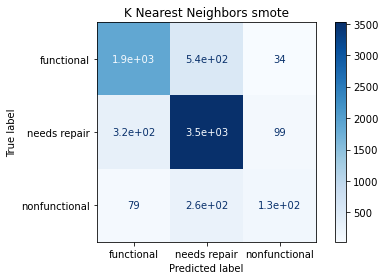

In [103]:
plot_confusion_matrix(forest, X_test, y_test, 
                      display_labels=['functional', 'needs repair', 
                                      'nonfunctional'], cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors smote')
plt.tight_layout()

plt.show()

### XGBoost

In [104]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=12)
xgb.fit(X_train, y_train);

metrics = get_metrics(y_test, X_test, xgb)
metrics['name'] = 'XG Boost'
models.append(metrics)

C:\Users\milen\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:41:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [105]:
print(confusion_matrix(y_test, xgb.predict(X_test)))
print(classification_report(y_test, xgb.predict(X_test)))

[[1797  628   24]
 [ 303 3590   45]
 [  82  294   97]]
              precision    recall  f1-score   support

           0       0.82      0.73      0.78      2449
           1       0.80      0.91      0.85      3938
           2       0.58      0.21      0.30       473

    accuracy                           0.80      6860
   macro avg       0.73      0.62      0.64      6860
weighted avg       0.79      0.80      0.79      6860



### Analysis

In [106]:
models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
1,0.806268,0.798156,0.797128,0.806268,Random Forest
2,0.799417,0.785764,0.791046,0.799417,XG Boost
0,0.527551,0.510876,0.504963,0.527551,K Nearest Neighbors


## Confusion matrix for knn baselinemodel

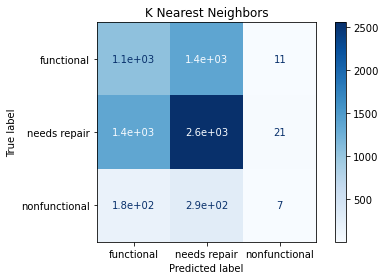

In [107]:
plot_confusion_matrix(knn, X_test, y_test, 
                      display_labels=['functional', 'needs repair', 
                                      'nonfunctional'], cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

## KNN

First scale the data. We scale the data after splitting the train and test data to avoid data leakage.

In [108]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler 


# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,id,amount_tsh,gps_height,longitude,latitude,permit,funder_0,funder_Amref,funder_Danida,funder_Dhv,...,source_type_spring,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_other,construction_periods_1960-1969,construction_periods_1970-1979,construction_periods_1980-1989,construction_periods_1990-1999,construction_periods_2000-2009,construction_periods_2010-2015
0,-0.329092,-0.091185,0.866186,-0.308466,-1.070743,0.644308,-0.148242,-0.109314,-0.246525,-0.117555,...,-0.739964,0.650827,-0.498941,-0.33003,-0.117395,-0.367005,-0.413476,2.074133,-0.819960,-0.388364
1,1.451489,-0.152088,0.258907,0.638751,1.165591,0.644308,-0.148242,-0.109314,-0.246525,-0.117555,...,1.351417,0.650827,-0.498941,-0.33003,-0.117395,-0.367005,2.418517,-0.482129,-0.819960,-0.388364
2,-0.755382,-0.136862,-1.470625,1.571973,-1.512117,0.644308,-0.148242,-0.109314,-0.246525,-0.117555,...,-0.739964,0.650827,-0.498941,-0.33003,-0.117395,-0.367005,2.418517,-0.482129,-0.819960,-0.388364
3,1.701715,-0.152088,0.726917,0.306292,1.076896,0.644308,-0.148242,-0.109314,-0.246525,-0.117555,...,1.351417,0.650827,-0.498941,-0.33003,-0.117395,-0.367005,2.418517,-0.482129,-0.819960,-0.388364
4,0.752277,0.152427,1.083187,-0.567485,-1.262331,-1.552054,-0.148242,-0.109314,-0.246525,-0.117555,...,-0.739964,0.650827,-0.498941,-0.33003,-0.117395,-0.367005,-0.413476,-0.482129,1.219571,-0.388364


Now that you've preprocessed the data it's time to train a KNN classifier and validate its accuracy.

In [109]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
knn = KNeighborsClassifier()
# Fit the classifier
knn.fit(scaled_data_train, y_train);


# Predict on the test set

metrics = get_metrics(y_test, scaled_data_test, knn)
metrics['name'] = 'K Nearest Neighbors scaled'
models.append(metrics)

In [110]:
models_df = pd.DataFrame(models)
models_df.sort_values(by='accuracy', ascending=False)

,accuracy,f1,precision,recall,name
1,0.806268,0.798156,0.797128,0.806268,Random Forest
2,0.799417,0.785764,0.791046,0.799417,XG Boost
3,0.765015,0.755200,0.754952,0.765015,K Nearest Neighbors scaled
0,0.527551,0.510876,0.504963,0.527551,K Nearest Neighbors


### Optimazing k-value

### Grid search CV

In [111]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds, average='weighted')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))    


In [112]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 9
F1-Score: 0.7566010643744887


In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
param_grid = {
    'n_neighbors': [1, 5, 11], # default 5
    'weights': ['uniform', 'distance'], # default 'uniform'
    'leaf_size': [10, 20, 30, 40], # default 30
    'p': [1, 2] # default 2
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_search.fit(scaled_data_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [10, 20, 30, 40],
                         'n_neighbors': [1, 5, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [136]:
grid_search.best_params_

{'max_depth': None, 'max_features': 50, 'n_estimators': 500}

In [137]:
knn_tuned = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=10, p=1)
knn_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, knn_tuned)
metrics['name'] = 'KNN scaled'
models.append(metrics)

## Confusion Matrix

In [138]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

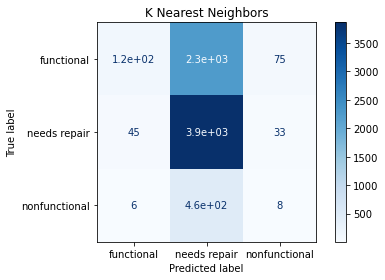

In [139]:
plot_confusion_matrix(knn_tuned, X_test, y_test, display_labels=['functional', 'needs repair', 'nonfunctional'], cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors')
plt.tight_layout()

plt.show()

## Smote

In [119]:
# !pip install imbalanced-learn==0.6.0
# !pip install scikit-learn==0.22.1

In [140]:
from imblearn.over_sampling import SMOTE

In [141]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(scaled_data_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

1    19552
0    12478
2     2268
Name: status_group, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

2    15614
1    15614
0    15614
Name: status_group, dtype: int64


In [142]:
# # Import StandardScaler
# from sklearn.preprocessing import StandardScaler 


# # Instantiate StandardScaler
# scaler = StandardScaler()

# # Transform the training and test sets
# scaled_data_train = scaler.fit_transform(X_train)
# scaled_data_test = scaler.transform(X_test)

# # Convert into a DataFrame
# scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
# scaled_df_train.head()

In [143]:
knn_smote = KNeighborsClassifier(n_neighbors=9, weights='distance', leaf_size=10, p=1)
knn_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, X_test, knn_smote)
metrics['name'] = 'KNN smote'
models.append(metrics)

In [144]:
print(confusion_matrix(y_test, knn_smote.predict(scaled_data_test)))
print(classification_report(y_test, knn_smote.predict(scaled_data_test)))

[[1804  479  166]
 [ 484 3022  432]
 [  71  148  254]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2449
           1       0.83      0.77      0.80      3938
           2       0.30      0.54      0.38       473

    accuracy                           0.74      6860
   macro avg       0.63      0.68      0.64      6860
weighted avg       0.77      0.74      0.75      6860



## Confusion Matrix

In [ ]:
plot_confusion_matrix(knn_smote, scaled_data_test, y_test, 
                      display_labels=['functional', 'needs repair', 
                                      'nonfunctional'], cmap=plt.cm.Blues)
plt.title('K Nearest Neighbors smote')
plt.tight_layout()

plt.show()

## Random forest

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [127]:
baseline = RandomForestClassifier()
baseline.fit(X_train, y_train)
get_metrics(y_test, X_test, baseline)

{'accuracy': 0.8024781341107872,
 'f1': 0.7945578311052512,
 'precision': 0.7927940537105543,
 'recall': 0.8024781341107872}


## GridSearch CV

In [128]:
param_grid = {
    'n_estimators': [10, 100, 500], # default 100
    'max_depth': [None, 10], # default None
    'max_features': ['auto', 50, None] # default 'auto': auto=sqrt(# of features)=11, None=# of features=122
}
forest = RandomForestClassifier()
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring='f1_macro')
grid_search.fit(scaled_data_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [129]:

grid_search.best_params_

{'max_depth': None, 'max_features': 50, 'n_estimators': 500}

In [130]:
forest_tuned = RandomForestClassifier(n_estimators=500, max_depth=None, max_features='auto')
forest_tuned.fit(scaled_data_train, y_train)
get_metrics(y_test, scaled_data_test, forest_tuned)
metrics['name'] = 'Random Forest scaled'
models.append(metrics)

In [131]:
print(confusion_matrix(y_test, forest_tuned.predict(scaled_data_test)))
print(classification_report(y_test, forest_tuned.predict(scaled_data_test)))

[[1877  536   36]
 [ 324 3505  109]
 [  80  263  130]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      2449
           1       0.81      0.89      0.85      3938
           2       0.47      0.27      0.35       473

    accuracy                           0.80      6860
   macro avg       0.70      0.64      0.66      6860
weighted avg       0.79      0.80      0.80      6860



### Confusion matrix

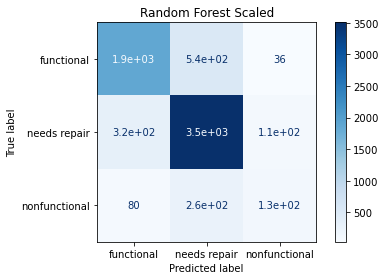

In [132]:
plot_confusion_matrix(forest_tuned, scaled_data_test, y_test, 
                      display_labels=['functional', 'needs repair', 
                                      'nonfunctional'], cmap=plt.cm.Blues)
plt.title('Random Forest Scaled')
plt.tight_layout()

plt.show()

In [133]:
models_df = pd.DataFrame(models)
models_df.sort_values(by='f1', ascending=False)

,accuracy,f1,precision,recall,name
1,0.806268,0.798156,0.797128,0.806268,Random Forest
2,0.799417,0.785764,0.791046,0.799417,XG Boost
3,0.765015,0.755200,0.754952,0.765015,Random Forest scaled
4,0.765015,0.755200,0.754952,0.765015,Random Forest scaled
5,0.765015,0.755200,0.754952,0.765015,Random Forest scaled
6,0.765015,0.755200,0.754952,0.765015,Random Forest scaled
0,0.527551,0.510876,0.504963,0.527551,K Nearest Neighbors


### Smote

In [134]:
# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(scaled_data_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

Original class distribution: 

1    19552
0    12478
2     2268
Name: status_group, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

2    15614
1    15614
0    15614
Name: status_group, dtype: int64


In [135]:
forest_smote = RandomForestClassifier(n_estimators=9, max_depth=, min_sample_leaf, min_sample_split= , max_features= , random_state= 42
forest_smote.fit(X_train_resampled, y_train_resampled)
get_metrics(y_test, scaled_data_test, forest_smote)
metrics['name'] = 'Random Forest smote'
models.append(metrics)

SyntaxError: invalid syntax (<ipython-input-135-61fbdc30c85d>, line 1)

In [ ]:
print(confusion_matrix(y_test, forest_smote.predict(scaled_data_test)))
print(classification_report(y_test, forest_smote.predict(scaled_data_test)))

### Confusion matrix

In [ ]:
plot_confusion_matrix(forest_tuned, scaled_data_test, y_test, 
                      display_labels=['functional', 'needs repair', 
                                      'nonfunctional'], cmap=plt.cm.Blues)
plt.title('Random Forest Scaled')
plt.tight_layout()

plt.show()

In [ ]:
models_df = pd.DataFrame(models)
models_df.sort_values(by='f1', ascending=False)